100%|██████████| 305342/305342 [00:00<00:00, 1090912.26it/s]


379301 craters in step4_2e_5epoch.txt
284693 craters in step4_trail.txt

224624 craters in Robbins database


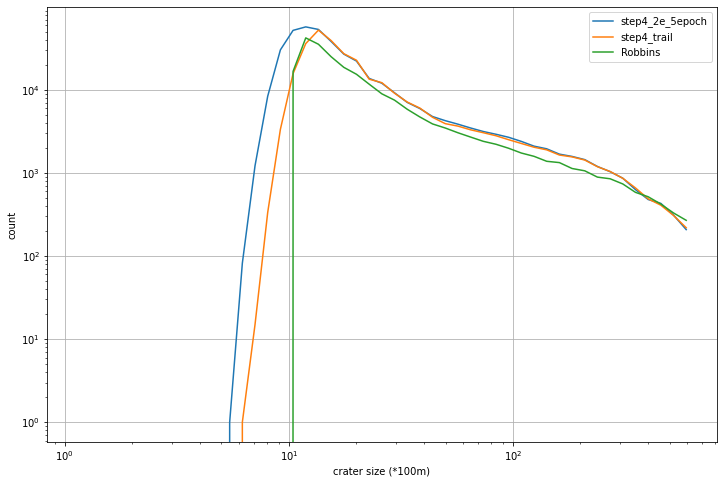

In [22]:
import matplotlib.pyplot as plt
import os
from math import cos, radians
from tqdm import tqdm
import numpy as np
import pandas as pd

folder_path = 'distribution'
resolution = 593
bins = np.logspace(0, 1, 50, base=593)
plt.figure(figsize=(12,8))

buffer = ''

for file_name in os.listdir(folder_path):
    if not file_name.endswith('txt'):
        continue

    size_list = []

    f = open(folder_path + '/' + file_name)

    w_scale = 1

    model_name = file_name[:-4]

    for line in tqdm(f.read().splitlines()):
        
        xs = line.split()
        
        if len(xs) < 4:
            lat = int(line.split('_')[0])
            w_scale = cos(radians(lat))
        else:
            w, h = line.split()[3: 5]
            w = float(w) * resolution * w_scale
            h = float(h) * resolution
            size_list.append(max(w, h))

    f.close()

    y, x = np.histogram(size_list, bins=bins)
    x = (x[1:] * x[:-1])**0.5
    plt.loglog(x, y, label=model_name)

    buffer += str(len(size_list)) + ' craters in ' + file_name + '\n'

print(buffer)


robbins = pd.read_csv('Robbins_essential.csv')
index = (robbins['LATITUDE_CIRCLE_IMAGE'] < 30) & (robbins['LATITUDE_CIRCLE_IMAGE'] > -30) & (robbins['DIAM_CIRCLE_IMAGE'] < resolution/10)
size_list = robbins['DIAM_CIRCLE_IMAGE'][index]
size_list *= 10
y, x = np.histogram(size_list, bins=bins)
x = (x[1:] * x[:-1])**0.5
plt.loglog(x, y, label='Robbins')

print(str(len(size_list)) + ' craters in Robbins database')


plt.ylabel('count')
plt.xlabel('crater size (*100m)')
plt.legend()
plt.grid(True)
plt.show()